In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This cell load and preproccess dataset

# Define some operations on dataset
transform = transforms.Compose(
    [transforms.Resize(32),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5, 0.5, 0.5],
                          std=[0.5,0.5,0.5])])

# Load dataset with pytorch
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Get indices by sorting labels
sorted_idx =  np.argsort(trainset.targets)

# Select from dataset uniformly
sampled_idx = []
for i in range(10):
    # select 1000 data for each label
    sampler = np.random.choice(5000, 1000, replace=False) + i*5000
    subidx = [sorted_idx[j] for j in sampler]
    sampled_idx.append(subidx)
sampled_idx = np.array(sampled_idx).reshape((10000,)).tolist()

# Generate a subest of training dataset
miniset = [trainset[idx] for idx in sampled_idx]
trainloader = torch.utils.data.DataLoader(miniset, batch_size=32,
                                          shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Parameter initialization
epoch_num = 100
learning_rate = 1e-3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Train: [1,   100] loss: 10.855 acc: 29.094
Train: [1,   200] loss: 8.666 acc: 32.812
Train: [1,   300] loss: 8.207 acc: 35.615
Test Accuracy: 41.830 %
Train: [2,   100] loss: 8.125 acc: 40.531
Train: [2,   200] loss: 7.717 acc: 41.953
Train: [2,   300] loss: 7.473 acc: 43.229
Test Accuracy: 47.740 %
Train: [3,   100] loss: 6.760 acc: 51.188
Train: [3,   200] loss: 6.857 acc: 51.312
Train: [3,   300] loss: 6.792 acc: 51.104
Test Accuracy: 45.810 %
Train: [4,   100] loss: 6.068 acc: 56.781
Train: [4,   200] loss: 6.097 acc: 56.203
Train: [4,   300] loss: 6.110 acc: 56.344
Test Accuracy: 52.920 %
Train: [5,   100] loss: 5.222 acc: 62.281
Train: [5,   200] loss: 5.402 acc: 61.922
Train: [5,   300] loss: 5.618 acc: 61.354
Test Accuracy: 52.700 %
Train: [6,   100] loss: 4.586 acc: 67.000
Train: [6,   200] loss: 4.815 acc: 66.719
Train: [6,   300] loss: 4.727 acc: 66.854
Test Accuracy: 56.080 %
Train: [7,   100] loss: 4.050 acc: 71.062
Train: [7,   200] loss: 4.074 acc: 71.047
Train: [7,   30

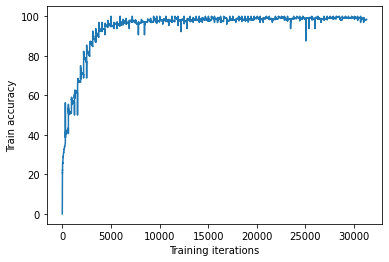

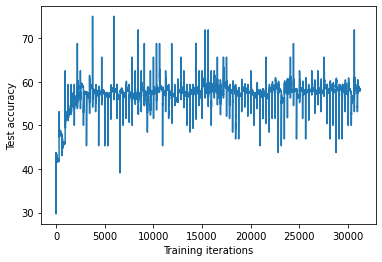

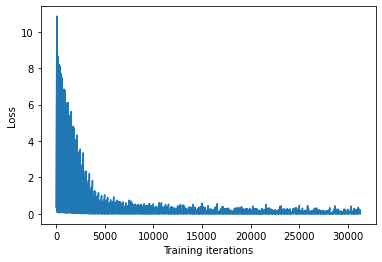

In [4]:
test_accuracy = []
train_accuracy = []
train_loss = []
loss = 0

# Load a untrained Resnet18 model
model = torchvision.models.resnet18(pretrained=False).to(device)
model.train()

# Chose loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model with no data augmentation
for epoch in range(epoch_num):
    # init elements
    running_loss = 0.0
    test_min_acc = 0
    total = 0
    correct = 0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum().item()

        train_loss.append(running_loss/20)
        train_accuracy.append(100.0*correct/total)

        if i % 100 == 99:    # print every 100 mini-batches
            print('Train: [%d, %5d] loss: %.3f acc: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20, 100.0*correct/total))
            running_loss = 0.0

    # Run validation on test set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            model.eval()
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted.cpu() == labels).sum().item()
            test_accuracy.append(100.0*correct/total)
    test_ep_acc = test_accuracy[-1]
    print('Test Accuracy: %.3f %%' % (test_ep_acc))

plt.plot(train_accuracy)
plt.xlabel('Training iterations')
plt.ylabel('Train accuracy')
plt.show()
    
plt.plot(test_accuracy)
plt.xlabel('Training iterations')
plt.ylabel('Test accuracy')
plt.show()

plt.plot(train_loss)
plt.xlabel('Training iterations')
plt.ylabel('Loss')
plt.show()

Train: [1,   100] loss: 13.100 acc: 15.875
Train: [1,   200] loss: 11.192 acc: 18.141
Train: [1,   300] loss: 11.292 acc: 18.698
Test Accuracy: 26.550 %
Train: [2,   100] loss: 11.289 acc: 17.938
Train: [2,   200] loss: 11.121 acc: 18.312
Train: [2,   300] loss: 11.018 acc: 18.677
Test Accuracy: 34.020 %
Train: [3,   100] loss: 10.967 acc: 20.688
Train: [3,   200] loss: 10.807 acc: 21.797
Train: [3,   300] loss: 10.872 acc: 22.219
Test Accuracy: 35.120 %
Train: [4,   100] loss: 10.980 acc: 21.438
Train: [4,   200] loss: 10.907 acc: 21.984
Train: [4,   300] loss: 10.263 acc: 23.865
Test Accuracy: 36.420 %
Train: [5,   100] loss: 10.866 acc: 23.438
Train: [5,   200] loss: 10.697 acc: 24.078
Train: [5,   300] loss: 10.773 acc: 23.854
Test Accuracy: 41.510 %
Train: [6,   100] loss: 10.444 acc: 27.188
Train: [6,   200] loss: 10.580 acc: 27.422
Train: [6,   300] loss: 10.495 acc: 27.177
Test Accuracy: 42.740 %
Train: [7,   100] loss: 10.221 acc: 29.406
Train: [7,   200] loss: 10.136 acc: 29.

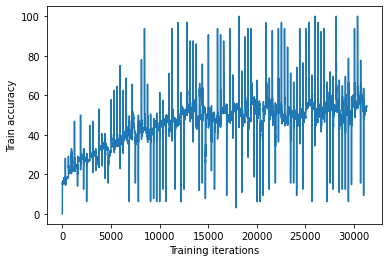

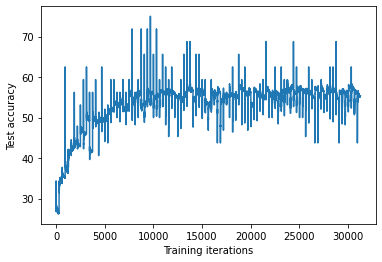

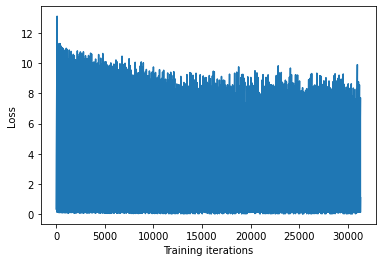

In [5]:
# Mixup minibatch with alpha=0.2
def mixup(x, y, alpha):
    # Gnearate lambda
    lam = np.random.beta(alpha, alpha)
    num = x.shape[0]
    new_x = torch.zeros(x.shape)
    new_y = torch.zeros(y.shape)
    # Mixup each tensor with a random tensor in minibatch
    for j in range(num):
        k = np.random.randint(0, num)
        new_x[j] = lam*x[j] + (1-lam)*x[k]
        new_y[j] = lam*y[j] + (1-lam)*y[k]
    return new_x, new_y


test_accuracy = []
train_accuracy = []
train_loss = []                                          
loss=0

# Load a untrained Resnet18 model
model = torchvision.models.resnet18(pretrained=False).to(device)
model.train()

# Chose loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

alpha = 0.2

# Train th mdoel with mixup operation
for epoch in range(epoch_num):
    # init elements
    running_loss = 0.0
    test_min_acc = 0
    total = 0
    correct = 0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs
        inputs, labels = data

        mixed_inputs, mixed_labels = mixup(inputs.clone(), labels.clone(), alpha)
        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(mixed_inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum().item()

        train_loss.append(running_loss/20)
        train_accuracy.append(100.0*correct/total)

        if i % 100 == 99:    # print every 100 mini-batches
            print('Train: [%d, %5d] loss: %.3f acc: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20, 100.0*correct/total))
            running_loss = 0.0

    # Run validation on test set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            model.eval()
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted.cpu() == labels).sum().item()
            test_accuracy.append(100.0*correct/total)
    test_ep_acc = test_accuracy[-1]
    print('Test Accuracy: %.3f %%' % (test_ep_acc))

plt.plot(train_accuracy)
plt.xlabel('Training iterations')
plt.ylabel('Train accuracy')
plt.show()
    
plt.plot(test_accuracy)
plt.xlabel('Training iterations')
plt.ylabel('Test accuracy')
plt.show()

plt.plot(train_loss)
plt.xlabel('Training iterations')
plt.ylabel('Loss')
plt.show()

Train: [1,   100] loss: 13.152 acc: 15.125
Train: [1,   200] loss: 11.276 acc: 17.250
Train: [1,   300] loss: 11.050 acc: 18.573
Test Accuracy: 29.680 %
Train: [2,   100] loss: 11.040 acc: 20.188
Train: [2,   200] loss: 10.929 acc: 20.344
Train: [2,   300] loss: 11.040 acc: 20.552
Test Accuracy: 36.760 %
Train: [3,   100] loss: 10.878 acc: 22.719
Train: [3,   200] loss: 11.002 acc: 21.938
Train: [3,   300] loss: 10.886 acc: 22.198
Test Accuracy: 34.140 %
Train: [4,   100] loss: 10.496 acc: 26.531
Train: [4,   200] loss: 10.721 acc: 25.266
Train: [4,   300] loss: 10.786 acc: 25.135
Test Accuracy: 40.270 %
Train: [5,   100] loss: 10.625 acc: 24.656
Train: [5,   200] loss: 10.640 acc: 25.078
Train: [5,   300] loss: 10.627 acc: 25.208
Test Accuracy: 41.170 %
Train: [6,   100] loss: 10.706 acc: 24.875
Train: [6,   200] loss: 10.707 acc: 24.875
Train: [6,   300] loss: 10.621 acc: 25.271
Test Accuracy: 41.060 %
Train: [7,   100] loss: 10.473 acc: 28.125
Train: [7,   200] loss: 10.343 acc: 28.

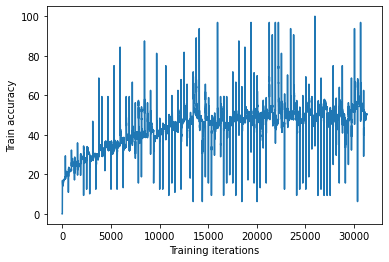

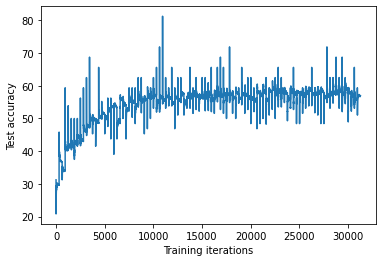

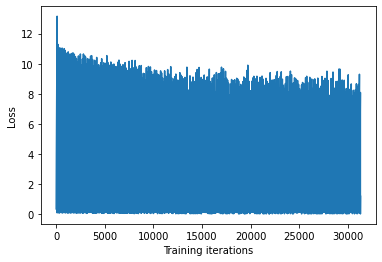

In [6]:
# Mixup minibatch with alpha=0.4
def mixup(x, y, alpha):
    # Gnearate lambda
    lam = np.random.beta(alpha, alpha)
    num = x.shape[0]
    new_x = torch.zeros(x.shape)
    new_y = torch.zeros(y.shape)
    # Mixup each tensor with a random tensor in minibatch
    for j in range(num):
        k = np.random.randint(0, num)
        new_x[j] = lam*x[j] + (1-lam)*x[k]
        new_y[j] = lam*y[j] + (1-lam)*y[k]
    return new_x, new_y


test_accuracy = []
train_accuracy = []
train_loss = []                                          
loss=0

# Load a untrained Resnet18 model
model = torchvision.models.resnet18(pretrained=False).to(device)
model.train()

# Chose loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

alpha = 0.4

# Train th mdoel with mixup operation
for epoch in range(epoch_num):
    # init elements
    running_loss = 0.0
    test_min_acc = 0
    total = 0
    correct = 0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs
        inputs, labels = data

        mixed_inputs, mixed_labels = mixup(inputs.clone(), labels.clone(), alpha)
        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(mixed_inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum().item()

        train_loss.append(running_loss/20)
        train_accuracy.append(100.0*correct/total)

        if i % 100 == 99:    # print every 100 mini-batches
            print('Train: [%d, %5d] loss: %.3f acc: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20, 100.0*correct/total))
            running_loss = 0.0

    # Run validation on test set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            model.eval()
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted.cpu() == labels).sum().item()
            test_accuracy.append(100.0*correct/total)
    test_ep_acc = test_accuracy[-1]
    print('Test Accuracy: %.3f %%' % (test_ep_acc))

plt.plot(train_accuracy)
plt.xlabel('Training iterations')
plt.ylabel('Train accuracy')
plt.show()
    
plt.plot(test_accuracy)
plt.xlabel('Training iterations')
plt.ylabel('Test accuracy')
plt.show()

plt.plot(train_loss)
plt.xlabel('Training iterations')
plt.ylabel('Loss')
plt.show()

Train: [1,   100] loss: 11.361 acc: 27.938
Train: [1,   200] loss: 9.070 acc: 31.000
Train: [1,   300] loss: 8.369 acc: 33.865
Test Accuracy: 44.210 %
Train: [2,   100] loss: 8.819 acc: 35.781
Train: [2,   200] loss: 8.041 acc: 38.812
Train: [2,   300] loss: 7.847 acc: 40.042
Test Accuracy: 44.990 %
Train: [3,   100] loss: 7.478 acc: 44.594
Train: [3,   200] loss: 7.590 acc: 44.734
Train: [3,   300] loss: 7.301 acc: 45.260
Test Accuracy: 51.970 %
Train: [4,   100] loss: 6.834 acc: 50.969
Train: [4,   200] loss: 6.741 acc: 50.438
Train: [4,   300] loss: 6.894 acc: 50.292
Test Accuracy: 49.300 %
Train: [5,   100] loss: 6.428 acc: 54.188
Train: [5,   200] loss: 6.384 acc: 54.266
Train: [5,   300] loss: 6.522 acc: 53.667
Test Accuracy: 51.470 %
Train: [6,   100] loss: 5.908 acc: 56.938
Train: [6,   200] loss: 5.918 acc: 57.625
Train: [6,   300] loss: 6.032 acc: 57.479
Test Accuracy: 55.810 %
Train: [7,   100] loss: 5.309 acc: 61.031
Train: [7,   200] loss: 5.612 acc: 60.609
Train: [7,   30

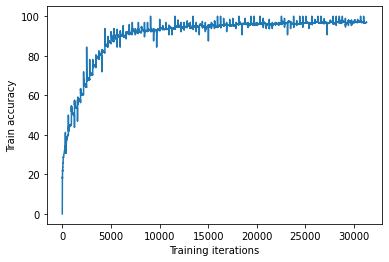

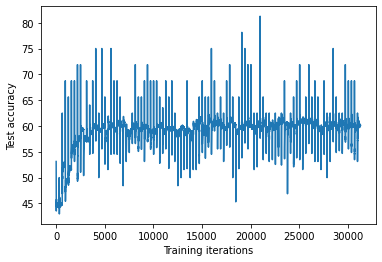

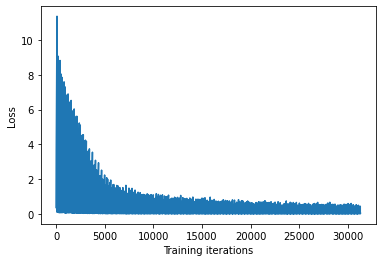

In [7]:
# Cutout part of the image by 16*16
def cutout(image):
    for j in range(image.shape[0]):
        if np.random.randint(2) == 1:
            x_pos = np.random.randint(0,32)
            y_pos = np.random.randint(0,32)
            x_min = max(0, (x_pos-8))
            x_max = min(32, (x_pos+8))
            y_min = max(0, (y_pos-8))
            y_max = min(32, (y_pos+8))
            image[j, :, x_min:x_max, y_min:y_max] = 0
    return image


test_accuracy = []
train_accuracy = []
train_loss = []
loss = 0
# Load a untrained Resnet18 model
model = torchvision.models.resnet18(pretrained=False).to(device)
model.train()

# Chose loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model with cutout operation
for epoch in range(epoch_num):
    # init elements
    running_loss = 0.0
    test_min_acc = 0
    total = 0
    correct = 0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs
        inputs, labels = data

        cutout_inputs = cutout(inputs.clone())
        #new_inputs = F.interpolate(cutout_inputs, size=224)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(cutout_inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum().item()

        train_loss.append(running_loss/20)
        train_accuracy.append(100.0*correct/total)

        if i % 100 == 99:    # print every 100 mini-batches
            print('Train: [%d, %5d] loss: %.3f acc: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20, 100.0*correct/total))
            running_loss = 0.0

    # Run validation on test set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            model.eval()
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted.cpu() == labels).sum().item()
            test_accuracy.append(100.0*correct/total)
    test_ep_acc = test_accuracy[-1]
    print('Test Accuracy: %.3f %%' % (test_ep_acc))

plt.plot(train_accuracy)
plt.xlabel('Training iterations')
plt.ylabel('Train accuracy')
plt.show()
    
plt.plot(test_accuracy)
plt.xlabel('Training iterations')
plt.ylabel('Test accuracy')
plt.show()

plt.plot(train_loss)
plt.xlabel('Training iterations')
plt.ylabel('Loss')
plt.show()

Train: [1,   100] loss: 11.353 acc: 25.719
Train: [1,   200] loss: 9.060 acc: 29.234
Train: [1,   300] loss: 8.623 acc: 31.677
Test Accuracy: 40.450 %
Train: [2,   100] loss: 9.106 acc: 32.344
Train: [2,   200] loss: 8.376 acc: 35.266
Train: [2,   300] loss: 8.278 acc: 36.562
Test Accuracy: 41.780 %
Train: [3,   100] loss: 8.038 acc: 40.312
Train: [3,   200] loss: 8.015 acc: 41.031
Train: [3,   300] loss: 7.629 acc: 41.990
Test Accuracy: 44.840 %
Train: [4,   100] loss: 7.652 acc: 42.531
Train: [4,   200] loss: 7.631 acc: 42.094
Train: [4,   300] loss: 7.420 acc: 43.385
Test Accuracy: 46.380 %
Train: [5,   100] loss: 7.311 acc: 47.375
Train: [5,   200] loss: 7.245 acc: 46.938
Train: [5,   300] loss: 6.952 acc: 47.458
Test Accuracy: 49.430 %
Train: [6,   100] loss: 6.936 acc: 50.094
Train: [6,   200] loss: 6.952 acc: 50.125
Train: [6,   300] loss: 6.728 acc: 50.490
Test Accuracy: 54.250 %
Train: [7,   100] loss: 6.833 acc: 50.719
Train: [7,   200] loss: 6.414 acc: 52.422
Train: [7,   30

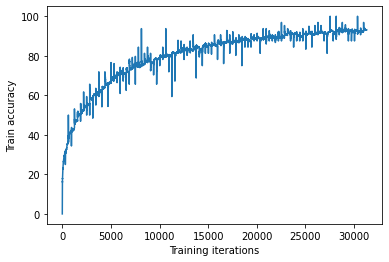

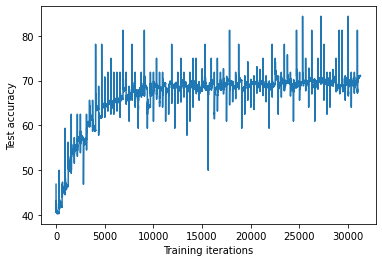

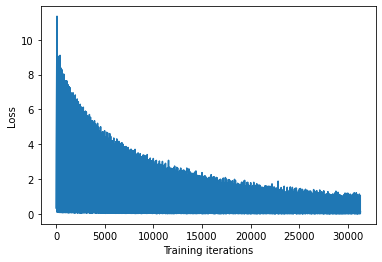

In [8]:
# Standard operations
def Standard(batch):
    pad_batch = torch.zeros([batch.shape[0],batch.shape[1],batch.shape[2]+8,batch.shape[3]+8])
    pad_batch[:,:,4:36,4:36] = batch
    new_batch = torch.zeros(batch.shape)
    for (j,image) in enumerate(batch, 0):
        [k1, k2] = np.random.randint(-4, 5, size =2)
        # cut the image by pixel k1, k2
        new_batch[j,:,:,:] = pad_batch[j,:,(4-k1):(36-k1),(4+k2):(36+k2)]
        # if k1>=0 and k2>=0:
        #     new_batch[j, :, 0:(32-k1), k2:32] = batch[j, :,k1:32,0:(32-k2)]
        # elif k1>=0 and k2<0:
        #     new_batch[j, :, 0:(32-k1), 0:(32+k2)] = batch[j, :,k1:32,-k2:32]
        # elif k1<0 and k2>=0:
        #     new_batch[j, :, -k1:32, k2:32] = batch[j, :,0:(32+k1),0:(32-k2)]
        # else:
        #     new_batch[j, :, -k1:32, 0:(32+k2)] = batch[j, :,0:(32+k1),-k2:32]
        
        # filp hrizonally by 50%
        if np.random.randint(2)==1:
            new_batch[j,:,:,:] = torch.flip(new_batch[j,:,:,:], [2])
    return new_batch


test_accuracy = []
train_accuracy = []
train_loss = []
loss = 0

# Load a untrained Resnet18 model
model = torchvision.models.resnet18(pretrained=False).to(device)
model.train()

# Chose loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model with Standard data agumentation
for epoch in range(epoch_num):
    # init elements
    running_loss = 0.0
    test_min_acc = 0
    total = 0
    correct = 0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Run cutout on this minibatch
        std_inputs = Standard(inputs.clone())
        # forward + backward + optimize
        outputs = model(std_inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum().item()

        train_loss.append(running_loss/20)
        train_accuracy.append(100.0*correct/total)

        if i % 100 == 99:    # print every 100 mini-batches
            print('Train: [%d, %5d] loss: %.3f acc: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20, 100.0*correct/total))
            running_loss = 0.0

    # Run validation on test set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            model.eval()
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted.cpu() == labels).sum().item()
            test_accuracy.append(100.0*correct/total)
    test_ep_acc = test_accuracy[-1]
    print('Test Accuracy: %.3f %%' % (test_ep_acc))

plt.plot(train_accuracy)
plt.xlabel('Training iterations')
plt.ylabel('Train accuracy')
plt.show()
    
plt.plot(test_accuracy)
plt.xlabel('Training iterations')
plt.ylabel('Test accuracy')
plt.show()

plt.plot(train_loss)
plt.xlabel('Training iterations')
plt.ylabel('Loss')
plt.show()

Train: [1,   100] loss: 12.932 acc: 16.719
Train: [1,   200] loss: 11.259 acc: 18.609
Train: [1,   300] loss: 11.469 acc: 18.646
Test Accuracy: 30.700 %
Train: [2,   100] loss: 11.044 acc: 21.562
Train: [2,   200] loss: 10.993 acc: 21.234
Train: [2,   300] loss: 11.114 acc: 20.635
Test Accuracy: 38.800 %
Train: [3,   100] loss: 10.689 acc: 25.312
Train: [3,   200] loss: 11.149 acc: 22.812
Train: [3,   300] loss: 10.789 acc: 23.073
Test Accuracy: 38.340 %
Train: [4,   100] loss: 10.854 acc: 22.688
Train: [4,   200] loss: 10.866 acc: 23.188
Train: [4,   300] loss: 10.908 acc: 22.865
Test Accuracy: 39.780 %
Train: [5,   100] loss: 10.072 acc: 30.562
Train: [5,   200] loss: 10.570 acc: 28.875
Train: [5,   300] loss: 10.745 acc: 27.333
Test Accuracy: 44.320 %
Train: [6,   100] loss: 10.898 acc: 23.781
Train: [6,   200] loss: 10.565 acc: 25.594
Train: [6,   300] loss: 10.748 acc: 25.604
Test Accuracy: 40.320 %
Train: [7,   100] loss: 10.647 acc: 26.750
Train: [7,   200] loss: 10.704 acc: 26.

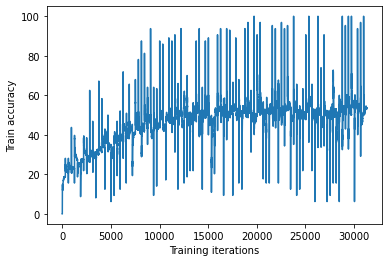

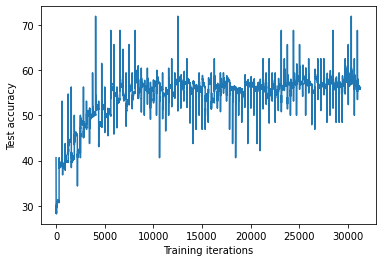

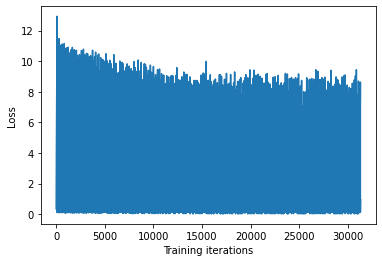

In [9]:
test_accuracy = []
train_accuracy = []
train_loss = []
loss = 0

# Load a untrained Resnet18 model
model = torchvision.models.resnet18(pretrained=False).to(device)
model.train()

# Chose loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
alpha = 0.2

# Train the model with all data augmentations
for epoch in range(epoch_num):
    # init elements
    running_loss = 0.0
    test_min_acc = 0
    total = 0
    correct = 0

    for i, data in enumerate(trainloader, 0):
        # Get the inputs
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Run all operations on current batch
        cutout_inputs = cutout(inputs.clone())
        std_inputs = Standard(cutout_inputs.clone())
        mixed_inputs, mixed_labels = mixup(inputs.clone(), labels.clone(), alpha)

        # forward + backward + optimize
        outputs = model(mixed_inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum().item()

        train_loss.append(running_loss/20)
        train_accuracy.append(100.0*correct/total)

        if i % 100 == 99:    # print every 100 mini-batches
            print('Train: [%d, %5d] loss: %.3f acc: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20, 100.0*correct/total))
            running_loss = 0.0

    # Run validation on test set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            model.eval()
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted.cpu() == labels).sum().item()
            test_accuracy.append(100.0*correct/total)
    test_ep_acc = test_accuracy[-1]
    print('Test Accuracy: %.3f %%' % (test_ep_acc))

plt.plot(train_accuracy)
plt.xlabel('Training iterations')
plt.ylabel('Train accuracy')
plt.show()
    
plt.plot(test_accuracy)
plt.xlabel('Training iterations')
plt.ylabel('Test accuracy')
plt.show()

plt.plot(train_loss)
plt.xlabel('Training iterations')
plt.ylabel('Loss')
plt.show()